Online payment fraud detection

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
import pickle
plt.style.use('ggplot')

In [5]:
data = pd.read_csv(r"D:\Data\Online payment fraud detection\data\PS_20174392719_1491204439457_log.csv")

In [6]:
df = pd.DataFrame(data)

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.drop('isFlaggedFraud', axis=1, inplace=True)

### **About Dataset**

The below column reference:

1. **step**: represents a unit of time where 1 step equals 1 hour
2. **type**: type of online transaction
3. **amount**: the amount of the transaction
4. **nameOrig**: customer starting the transaction
5. **oldbalanceOrg**: balance before the transaction
6. **newbalanceOrig**: balance after the transaction
7. **nameDest**: recipient of the transaction
8. **oldbalanceDest**: initial balance of recipient before the transaction
9. **newbalanceDest**: the new balance of recipient after the transaction
10. **isFraud**: fraud transaction



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


Univariate analysis

<Axes: xlabel='step', ylabel='Count'>

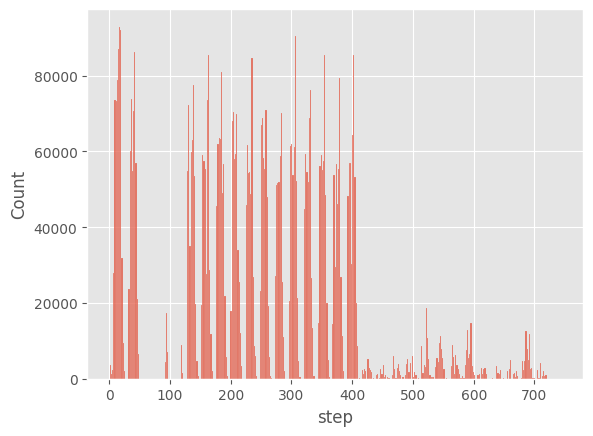

In [8]:
sns.histplot(data = df , x = 'step')

<Axes: xlabel='step'>

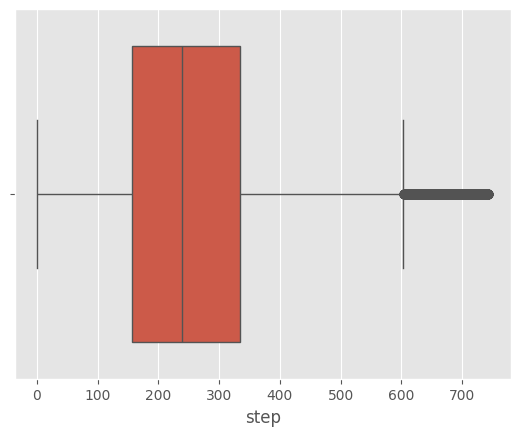

In [9]:
sns.boxplot(data = df , x = 'step')

<Axes: xlabel='type', ylabel='count'>

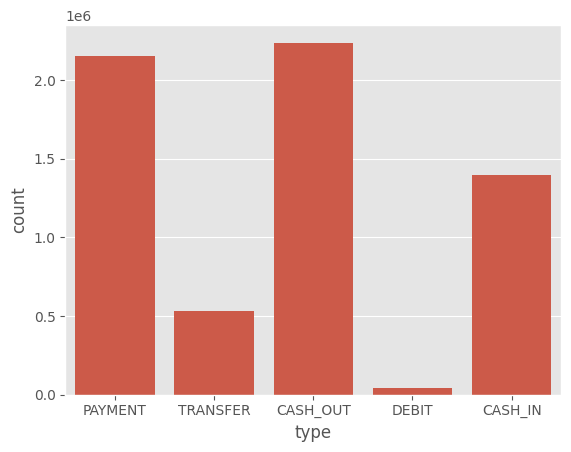

In [10]:
sns.countplot(data = df , x = 'type')

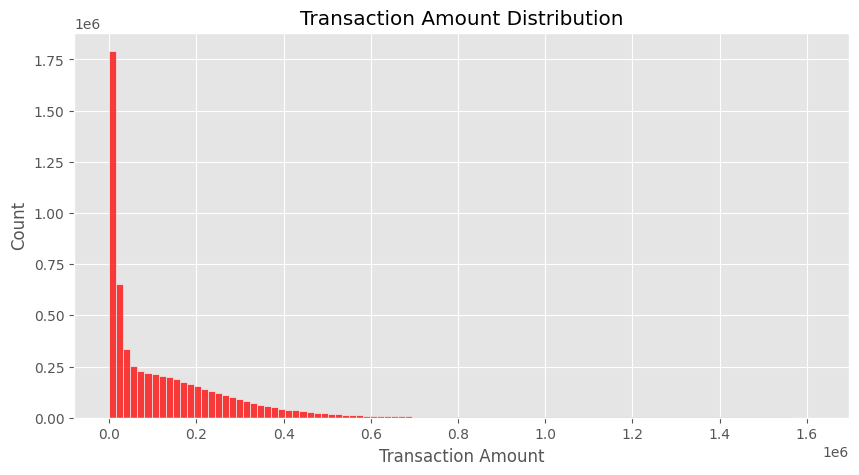

In [ ]:
sns.histplot(data = df , x = 'amount')

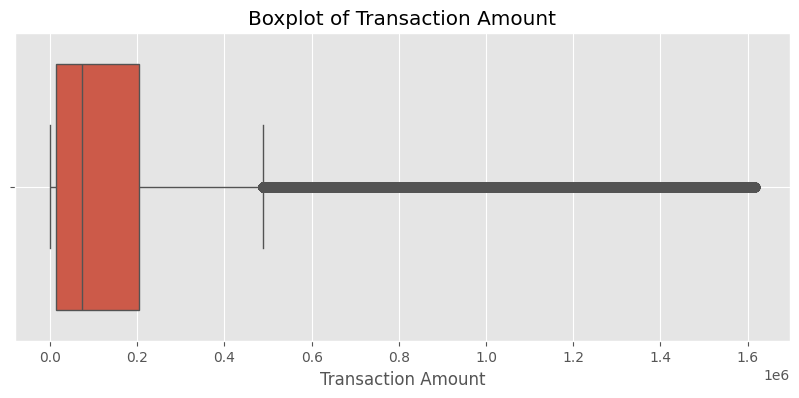

In [ ]:
sns.boxplot(data = df , x = 'amount')

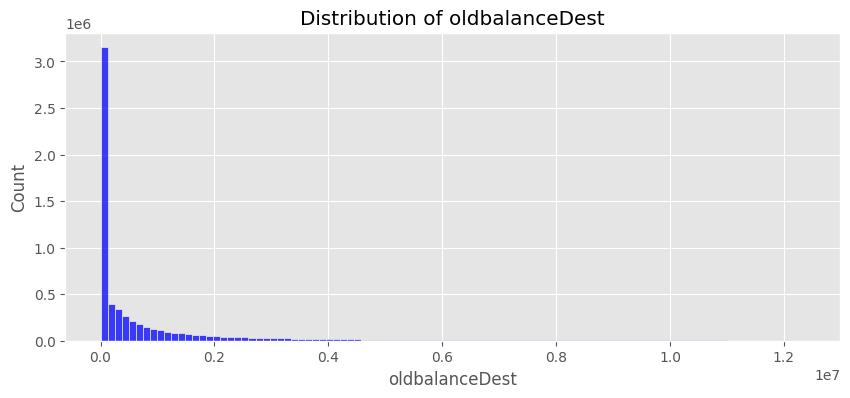

In [ ]:
sns.histplot(data = df , x = 'oldbalanceOrg')


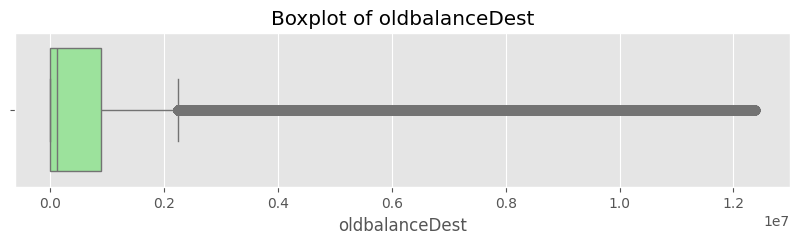

In [ ]:
sns.boxplot(data = df , x = 'oldbalanceDest')


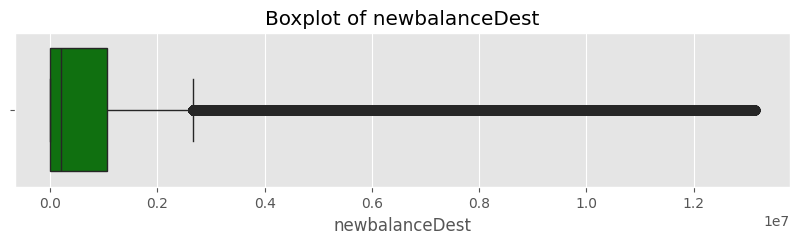

In [ ]:
sns.boxplot(data = df , x = 'newbalanceDest')

<Axes: xlabel='isFraud', ylabel='count'>

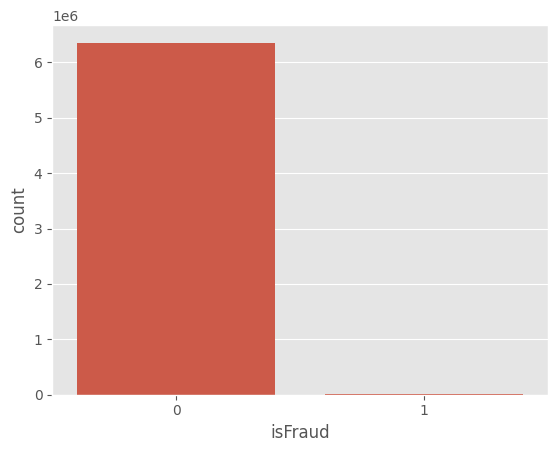

In [21]:
sns.countplot(data = df , x = 'isFraud')

In [22]:
df.loc[df['isFraud'] == 1,'isFraud'] = 'Fraud'
df.loc[df['isFraud'] == 0,'isFraud'] = 'Not Fraud'

In [23]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,Not Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,Not Fraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,Fraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,Not Fraud
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,Fraud
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,Fraud
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,Fraud
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,Fraud


Bivariate Analysis

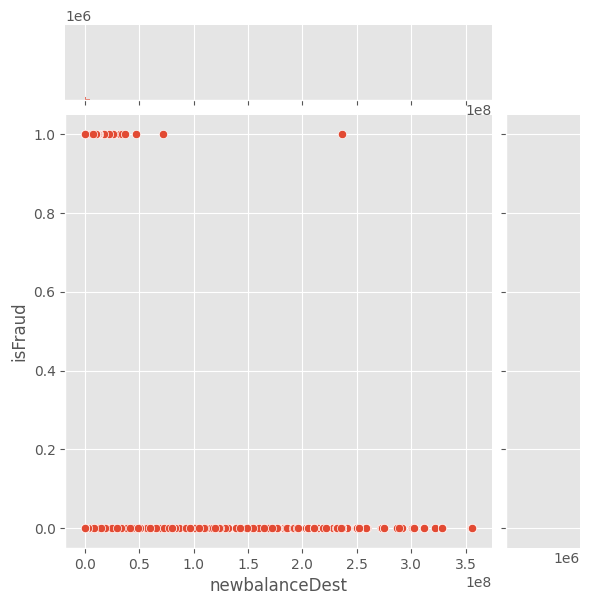

In [ ]:
sns.jointplot(data = df , x = 'newbalanceDest' , y = 'isFraud')

<Axes: xlabel='type', ylabel='count'>

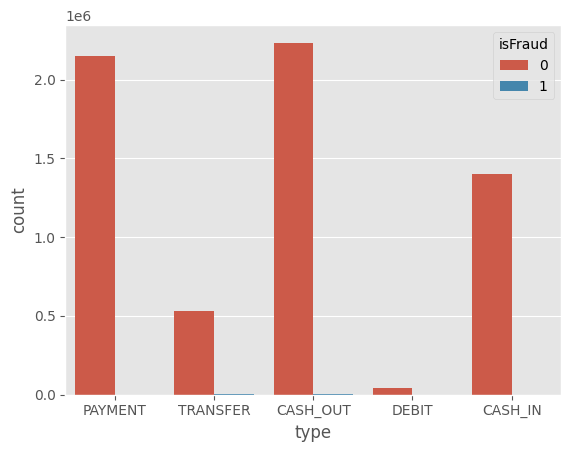

In [ ]:
sns.countplot(data = df , x = 'type' , hue = 'isFraud')

<Axes: xlabel='isFraud', ylabel='step'>

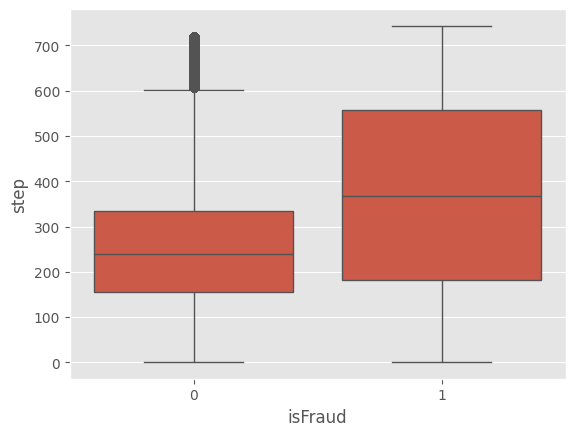

In [ ]:
sns.boxplot(data = df , x = 'isFraud' , y = 'step')

<Axes: xlabel='isFraud', ylabel='amount'>

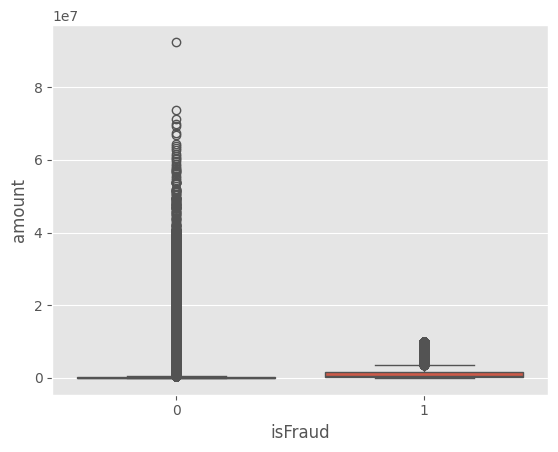

In [ ]:
sns.boxplot(data = df , x = 'isFraud' , y = 'amount')

<Axes: xlabel='isFraud', ylabel='oldbalanceDest'>

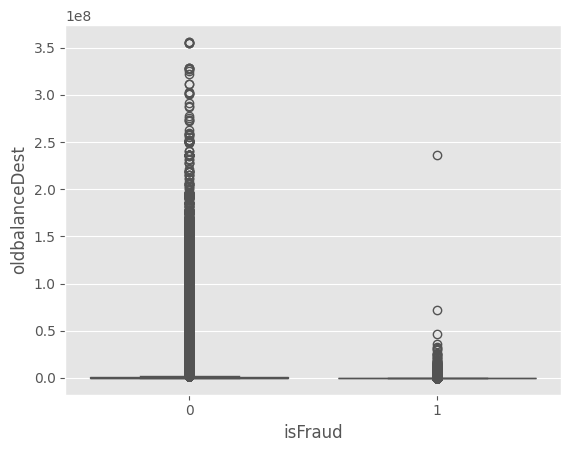

In [ ]:
sns.boxplot(data = df , x = 'isFraud' , y = 'oldbalanceDest')

<Axes: xlabel='isFraud', ylabel='newbalanceDest'>

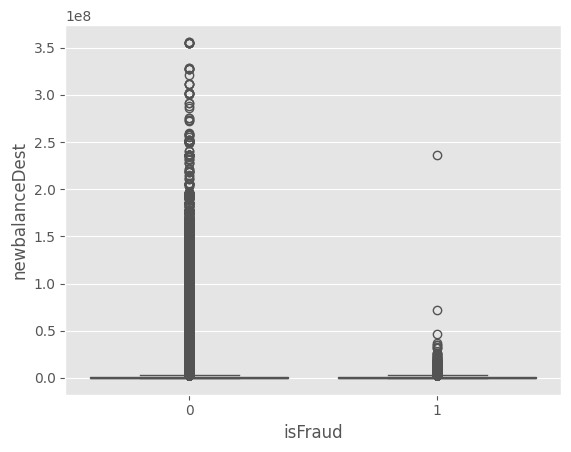

In [ ]:
sns.boxplot(data = df , x = 'isFraud' , y = 'newbalanceDest')

<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

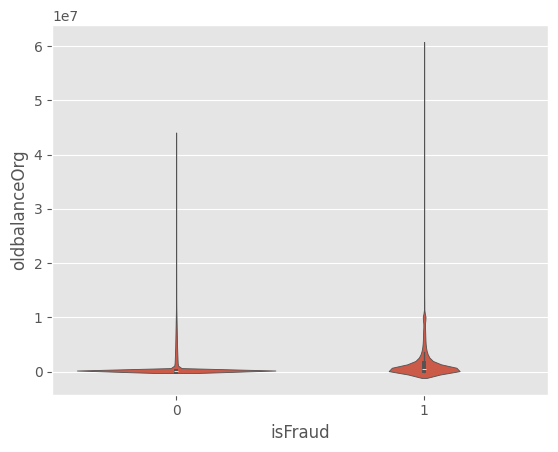

In [ ]:
sns.violinplot(data = df , x = 'isFraud' , y = 'oldbalanceOrg')

<Axes: xlabel='isFraud', ylabel='newbalanceOrig'>

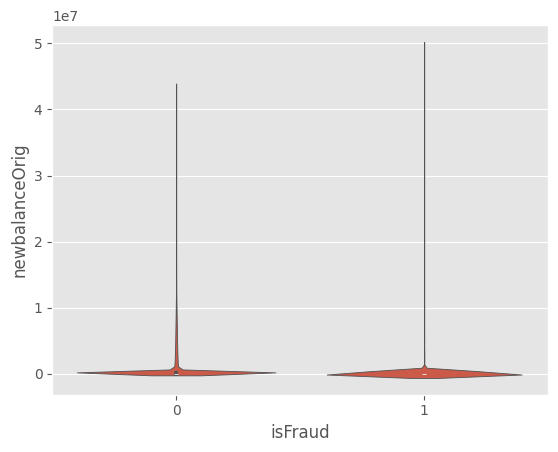

In [ ]:
sns.violinplot(data = df , x = 'isFraud' , y = 'newbalanceOrig')

In [ ]:
df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1677795071,NaN,NaN,C1286084959,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00


Checking for null values

In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


Handling outliers

<Axes: ylabel='amount'>

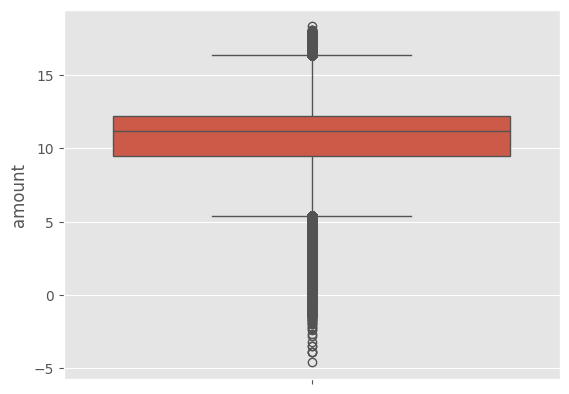

In [ ]:
sns.boxplot(df['amount'])

Removing outliers

In [5]:
from scipy import stats
print(stats.mode(df['amount']))
print(np.mean(df['amount']))
print(np.median(df['amount']))

ModeResult(mode=np.float64(10000000.0), count=np.int64(3207))
179861.90354913071
74871.94


In [6]:
q1 = np.quantile(df['amount'],0.25)
q3 = np.quantile(df['amount'],0.75)
iqr = q3-q1

upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5*iqr)

print(upper_bound)
print(lower_bound)

501719.33875
-279608.29125


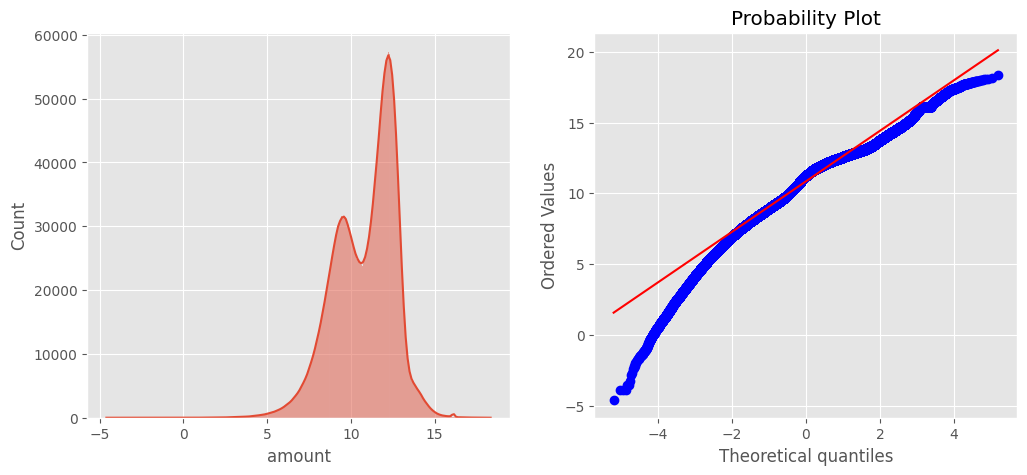

In [7]:
def transformationPlot(feature):
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    sns.histplot(feature, kde=True)

    plt.subplot(1,2,2)
    stats.probplot(feature, plot=plt)

    plt.show()

filtered_amount = df['amount'][df['amount'] > 0]
log_amount = np.log(filtered_amount)

transformationPlot(log_amount)


In [8]:
df['amount'] = np.log(df['amount'])

In [9]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9.194174,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,7.530630,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,5.198497,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,5.198497,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,9.364617,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [10]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

Eliminating irrelevant columns from the dataset

In [11]:
df.drop('nameOrig',axis =1 , inplace = True)

In [12]:
df.drop('nameDest',axis =1 , inplace = True)

Object Data LabelEncoding

In [13]:
la = LabelEncoder()
df['type'] = la.fit_transform(df['type'])

In [17]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9.194174,170136.0,160296.36,0.0,0.0,0
1,1,3,7.530630,21249.0,19384.72,0.0,0.0,0
2,1,4,5.198497,181.0,0.00,0.0,0.0,1
3,1,1,5.198497,181.0,0.00,21182.0,0.0,1
4,1,3,9.364617,41554.0,29885.86,0.0,0.0,0


In [18]:
df['type'].value_counts()

type
1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: count, dtype: int64

In [19]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9.194174,170136.0,160296.36,0.0,0.0,0
1,1,3,7.530630,21249.0,19384.72,0.0,0.0,0
2,1,4,5.198497,181.0,0.00,0.0,0.0,1
3,1,1,5.198497,181.0,0.00,21182.0,0.0,1
4,1,3,9.364617,41554.0,29885.86,0.0,0.0,0


In [20]:
df.corr()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.006635,0.007408,-0.010058,-0.010299,0.027665,0.025888,0.031578
type,0.006635,1.000000,-0.377490,-0.339760,-0.352758,-0.104679,-0.059364,0.020833
amount,0.007408,-0.377490,1.000000,0.106961,0.111432,0.227731,0.265950,0.041085
oldbalanceOrg,-0.010058,-0.339760,0.106961,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.010299,-0.352758,0.111432,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.027665,-0.104679,0.227731,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.025888,-0.059364,0.265950,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.031578,0.020833,0.041085,0.010154,-0.008148,-0.005885,0.000535,1.000000


<Axes: >

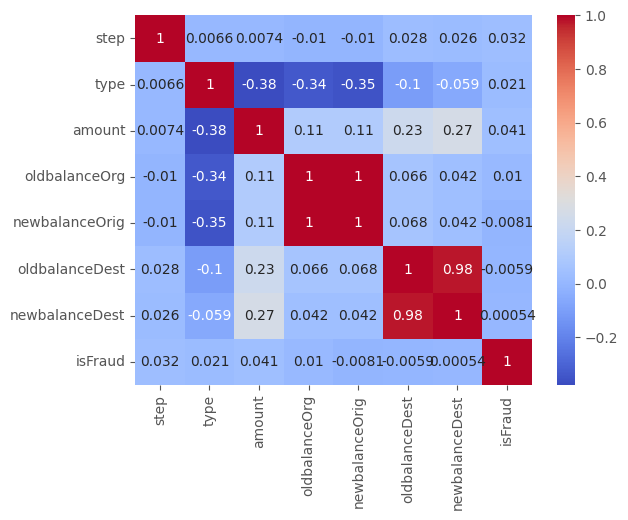

In [21]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [15]:
x = df.drop(['isFraud'],axis=1)
y = df['isFraud']

In [24]:
x

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9.194174,170136.00,160296.36,0.00,0.00
1,1,3,7.530630,21249.00,19384.72,0.00,0.00
2,1,4,5.198497,181.00,0.00,0.00,0.00
3,1,1,5.198497,181.00,0.00,21182.00,0.00
4,1,3,9.364617,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...,...
6362615,743,1,12.735766,339682.13,0.00,0.00,339682.13
6362616,743,4,15.657870,6311409.28,0.00,0.00,0.00
6362617,743,1,15.657870,6311409.28,0.00,68488.84,6379898.11
6362618,743,4,13.652995,850002.52,0.00,0.00,0.00


In [25]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5090096, 7)
(1272524, 7)
(5090096,)
(1272524,)


In [17]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median())

In [19]:
encode_standard = StandardScaler()
X_train = encode_standard.fit_transform(X_train)
X_test = encode_standard.transform(X_test)

In [20]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9.194174,170136.0,160296.36,0.0,0.0,0
1,1,3,7.530630,21249.0,19384.72,0.0,0.0,0
2,1,4,5.198497,181.0,0.00,0.0,0.0,1
3,1,1,5.198497,181.0,0.00,21182.0,0.0,1
4,1,3,9.364617,41554.0,29885.86,0.0,0.0,0


In [21]:
rfc = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    n_jobs=-1,
    random_state=42,
    verbose=1
)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.0min finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s


Accuracy: 0.999684878241982


[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    0.6s finished


In [23]:
y_train_predict1 = rfc.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_predict1)
print("Train Accuracy:", train_accuracy)
print(classification_report(y_train,y_train_predict1))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    2.5s finished


Train Accuracy: 0.9996878251412155
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083503
           1       1.00      0.76      0.86      6593

    accuracy                           1.00   5090096
   macro avg       1.00      0.88      0.93   5090096
weighted avg       1.00      1.00      1.00   5090096

F1 Score: 0.9996641539825333


In [24]:
pd.crosstab(y_test,y_pred)

col_0,0,1
isFraud,,
0,1270892,12
1,389,1231


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_test_pred2 = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred2)
print("Accuracy:", accuracy)

Accuracy: 0.9997163118338043


In [ ]:
y_train_predict2 = dtc.predict(X_train)
print(classification_report(y_train,y_train_predict2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083503
           1       1.00      1.00      1.00      6593

    accuracy                           1.00   5090096
   macro avg       1.00      1.00      1.00   5090096
weighted avg       1.00      1.00      1.00   5090096



In [ ]:
pd.crosstab(y_test,y_test_pred2)

col_0,0,1
isFraud,,
0,1270751,153
1,208,1412


In [ ]:
etc = ExtraTreesClassifier(
    n_estimators=50,
    max_depth=None,
    min_samples_split=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

etc.fit(X_train, y_train)

y_test_pred3 = etc.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred3)
print("Accuracy:", accuracy)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   45.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.4s


Accuracy: 0.9996895932807555


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    1.6s finished


In [ ]:
y_train_predict3 = etc.predict(X_train)
print(classification_report(y_train,y_train_predict3))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    7.0s finished


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083503
           1       1.00      0.95      0.97      6593

    accuracy                           1.00   5090096
   macro avg       1.00      0.97      0.99   5090096
weighted avg       1.00      1.00      1.00   5090096



In [ ]:
pd.crosstab(y_test,y_test_pred3)

col_0,0,1
isFraud,,
0,1270897,7
1,388,1232


In [ ]:
from sklearn.svm import LinearSVC

svc = SVC()
svc.fit(X_train, y_train)
y_test_pred4 = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred4)
print("Accuracy:", accuracy)

In [25]:
from sklearn.svm import LinearSVC

svc = SVC(kernel='linear', C=1.0, random_state=42, verbose=1)
svc.fit(X_train, y_train)
y_test_pred4 = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred4)
print("Accuracy:", accuracy)

TypeError: SVC.__init__() got an unexpected keyword argument 'n_jobs'

In [ ]:
y_train_predict4 = svc.predict(X_train)
print(classification_report(y_train,y_train_predict4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083503
           1       0.96      0.37      0.53      6593

    accuracy                           1.00   5090096
   macro avg       0.98      0.68      0.76   5090096
weighted avg       1.00      1.00      1.00   5090096



In [ ]:
pd.crosstab(y_test,y_test_pred4)

col_0,0,1
isFraud,,
0,1270878,26
1,1049,571


In [ ]:
%pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.4/322.4 MB 2.1 MB/s eta 0:00:00


In [ ]:
import xgboost as xgb

xgb1 = xgb.XGBClassifier()
xgb1.fit(X_train, y_train)
y_test_pred5 = xgb1.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred5)
print("Accuracy:", accuracy)

Accuracy: 0.9975882576674389


In [ ]:
y_train_predict5 = xgb1.predict(X_train)
print(accuracy_score(y_train,y_train_predict5))
print(classification_report(y_train,y_train_predict5))

0.99761458330059
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083503
           1       0.32      0.73      0.44      6593

    accuracy                           1.00   5090096
   macro avg       0.66      0.87      0.72   5090096
weighted avg       1.00      1.00      1.00   5090096



In [ ]:
pd.crosstab(y_test,y_test_pred5)

col_0,0,1
isFraud,,
0,1268264,2640
1,429,1191


In [ ]:
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree Test Accuracy:", accuracy_score(y_test, y_test_pred2))
print("Extra Trees Test Accuracy:", accuracy_score(y_test, y_test_pred3))
print("Linear SVC Test Accuracy:", accuracy_score(y_test, y_test_pred4))
print("XGBoost Test Accuracy:", accuracy_score(y_test, y_test_pred5))

Random Forest Test Accuracy: 0.9991599372585507
Decision Tree Test Accuracy: 0.9997163118338043
Extra Trees Test Accuracy: 0.9996895932807555
Linear SVC Test Accuracy: 0.9991552222197774
XGBoost Test Accuracy: 0.9975882576674389


In [ ]:
filename = 'decision_tree_model.pkl'
pickle.dump(dtc, open(filename, 'wb'))

print(f"Decision Tree model saved to {filename}")

Decision Tree model saved to decision_tree_model.pkl


In [ ]:
from sklearn.preprocessing import LabelEncoder

le_type = LabelEncoder()
df['type'] = le_type.fit_transform(df['type'])


Making it easier for the user to enter type, this model will decode it!

In [ ]:
import pickle
with open('type_label_encoder.pkl', 'wb') as f:
    pickle.dump(le_type, f)
